# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results.

## Overview

This notebook explores Dandiset 001433 "Breathing rhythm and place dataset", which contains behavioral and electrophysiological data from freely-behaving mice. The dataset includes recordings of sniffing, video, and olfactory bulb electrophysiology in mice without any specific stimulus, reward, or task.

**Dandiset Link**: [https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

## Contents of this Notebook

1. Accessing the Dandiset metadata
2. Exploring the files in the Dandiset
3. Loading and examining NWB file structure 
4. Analyzing and visualizing LFP data
5. Analyzing and visualizing sniffing data
6. Exploring relationships between breathing and neural activity

## Required Packages

The following packages are required to run this notebook:

- `dandi` - For accessing the Dandiset
- `pynwb` - For working with the NWB files
- `numpy` - For numerical data handling
- `matplotlib` - For data visualization
- `h5py` - For reading HDF5 files
- `remfile` - For remote file access
- `pandas` - For data manipulation

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient

# Set plots to be displayed inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Accessing Dandiset Metadata

Let's start by accessing the Dandiset and examining its metadata.

In [2]:
# Connect to DANDI and get the Dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"License: {metadata['license'][0]}")
print(f"Created on: {metadata['dateCreated']}")
print(f"Published on: {metadata['datePublished']}")

# Display contributors
print(f"\nContributors:")
for contributor in metadata['contributor']:
    if 'name' in contributor and 'roleName' in contributor:
        print(f"- {contributor['name']} ({', '.join(contributor['roleName'])})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903
License: spdx:CC-BY-4.0
Created on: 2025-05-05T18:39:37.730571+00:00
Published on: 2025-05-07T23:56:47.954574+00:00

Contributors:
- National Institutes of Health (NIH) (dcite:Funder)
- Smear, Matt (dcite:ContactPerson, dcite:Author, dcite:Conceptualization, dcite:DataCurator, dcite:DataManager)


## 2. Exploring Files in the Dandiset

Now, let's see what files are available in the Dandiset.

In [3]:
# Get the list of assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Total number of files: {len(assets)}")

# Display a summary of the files by subject
asset_paths = [asset.path for asset in assets]
subjects = set([path.split('/')[0] for path in asset_paths if '/' in path])
print(f"\nSubjects: {sorted(subjects)}")

# Count files per subject
for subject in sorted(subjects):
    subject_files = [path for path in asset_paths if path.startswith(f"{subject}/")]
    print(f"{subject}: {len(subject_files)} files")

# Show first 10 files as examples
print("\nSample of files:")
for path in sorted(asset_paths)[:10]:
    print(f"- {path}")

Total number of files: 27

Subjects: ['sub-4122', 'sub-4127', 'sub-4131', 'sub-4138']
sub-4122: 3 files
sub-4127: 9 files
sub-4131: 12 files
sub-4138: 3 files

Sample of files:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb
- sub-4127/sub-4127_ses-20250507T153010_ecephys.nwb
- sub-4127/sub-4127_ses-20250507T153020_ecephys.nwb
- sub-4127/sub-4127_ses-20250507T153032_ecephys.nwb
- sub-4127/sub-4127_ses-20250507T153048_ecephys.nwb
- sub-4127/sub-4127_ses-20250507T153100_ecephys.nwb


## 3. Loading and Examining NWB File Structure

Let's load one of the NWB files and examine its structure. We'll use streaming to access the file remotely rather than downloading it.

In [4]:
# Select a file to examine
file_path = "sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb"
asset = next(dandiset.get_assets_by_glob(file_path))
url = asset.download_url
print(f"Examining file: {file_path}")
print(f"File URL: {url}")

# Load the NWB file using streaming
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic information about the NWB file
print("\nNWB File Information:")
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Keywords: {list(nwb.keywords[:])}")

# Display subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Examining file: sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
File URL: https://api.dandiarchive.org/api/dandisets/001433/versions/0.250507.2356/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB File Information:
Session description: LFP and sniff recording
Identifier: 4122_4
Session start time: 2025-05-07 15:29:27.359523-07:00
Experiment description: LFP and sniff behavior recording
Lab: Smear lab
Institution: University of Oregon
Keywords: ['olfactory bulb', 'LFP', 'sniffing', 'mouse', 'neuroscience']

Subject Information:
Subject ID: 4122
Species: Mus musculus
Sex: M
Age: P90D
Description: Lab mouse used for sniffing + LFP experiment


## 4. Exploring the NWB File Contents

Now that we've loaded an NWB file, let's examine its data structure, including acquisition, processing, and electrode data.

In [5]:
# Show available acquisition data
print("Acquisition data keys:")
for key in nwb.acquisition.keys():
    print(f"- {key}")

# Look at the LFP data structure
lfp = nwb.acquisition["LFP"]
print("\nLFP Information:")
print(f"Description: {lfp.description}")
print(f"Sampling rate: {lfp.rate} Hz")
print(f"Unit: {lfp.unit}")
print(f"Duration: {len(lfp.data) / lfp.rate:.2f} seconds")
print(f"Number of channels: {lfp.data.shape[1]}")

# Examine the sniff signal
sniff = nwb.acquisition["SniffSignal"]
print("\nSniff Signal Information:")
print(f"Description: {sniff.description}")
print(f"Sampling rate: {sniff.rate} Hz")
print(f"Unit: {sniff.unit}")
print(f"Duration: {len(sniff.data) / sniff.rate:.2f} seconds")

Acquisition data keys:
- LFP
- SniffSignal

LFP Information:
Description: LFP signal from olfactory bulb
Sampling rate: 1000.0 Hz
Unit: volts
Duration: 1969.18 seconds
Number of channels: 16

Sniff Signal Information:
Description: Raw sniff thermistor voltage
Sampling rate: 1000.0 Hz
Unit: volts
Duration: 1969.18 seconds


## 5. Examining Electrode Information

Let's look at the electrode data to understand how the LFP data was recorded.

In [6]:
# Display information about electrodes
print("Electrode Information:")
electrode_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrode_df)}")
print("\nFirst 5 electrodes:")
print(electrode_df.head())

# Examine electrode groups
print("\nElectrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"- Group: {group_name}")
    print(f"  Location: {group.location}")
    print(f"  Description: {group.description}")
    print(f"  Device: {group.device.description}")

Electrode Information:
Number of electrodes: 16

First 5 electrodes:
          location                                              group  \
id                                                                      
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...   
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...   
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...   
3   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...   
4   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x139...   

   group_name filtering  
id                       
0    LFPGroup      none  
1    LFPGroup      none  
2    LFPGroup      none  
3    LFPGroup      none  
4    LFPGroup      none  

Electrode Groups:
- Group: LFPGroup
  Location: Olfactory Bulb
  Description: LFP recording electrodes
  Device: OpenEphys recording system


## 6. Visualizing LFP Data

Let's visualize a short segment of LFP data to see the neural activity patterns.

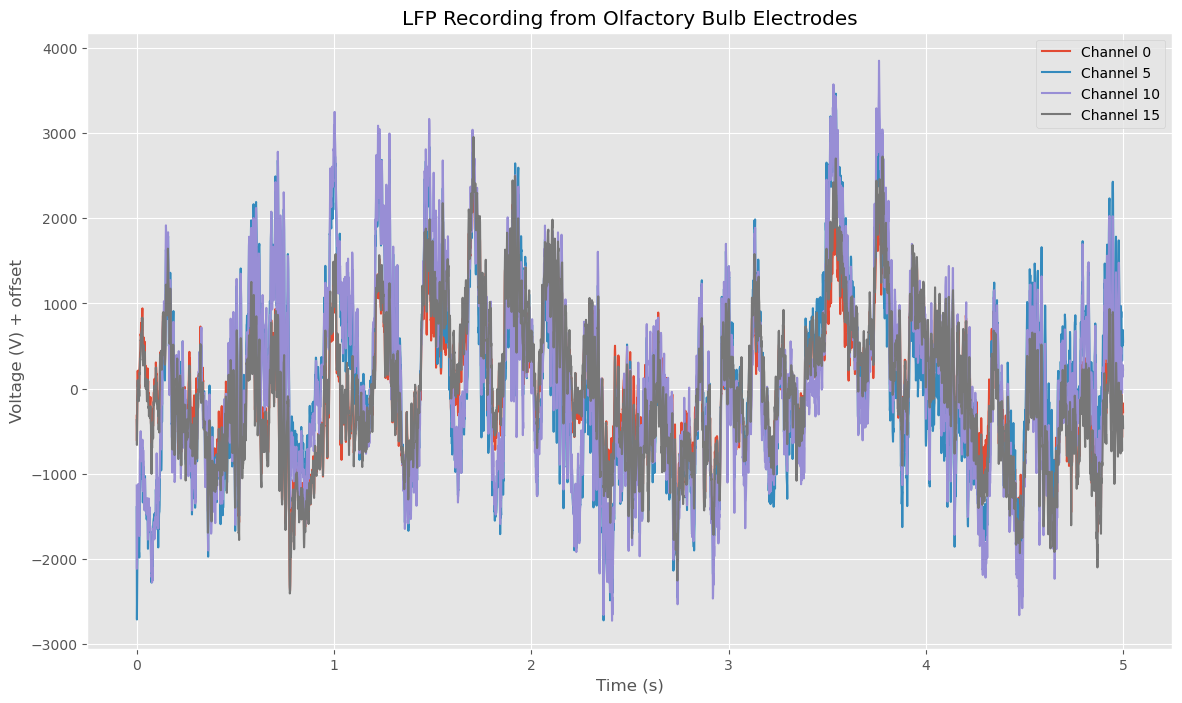

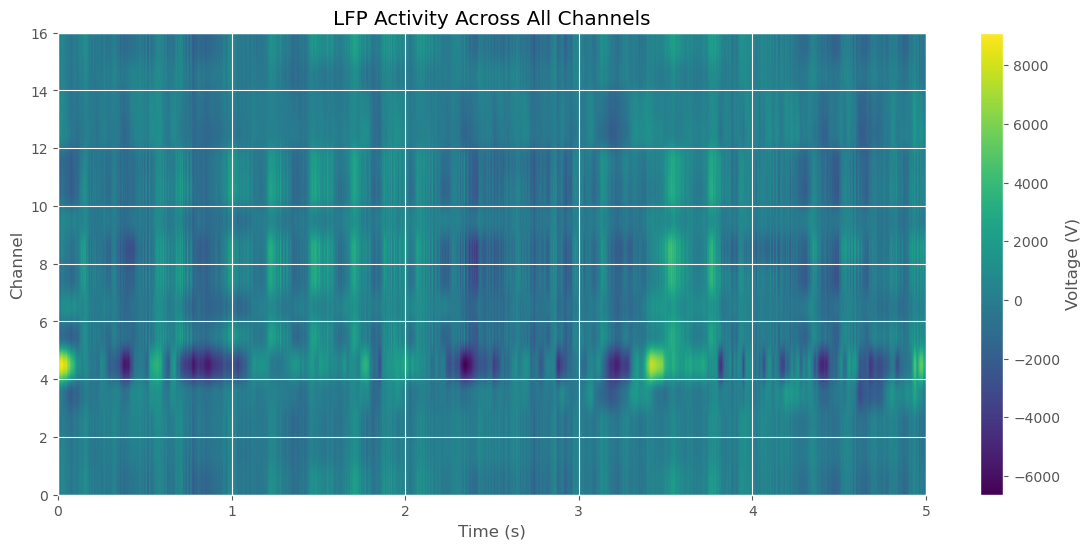

In [7]:
# Plot a sample of LFP data (first 5 seconds)
time_window = 5  # seconds
samples = int(time_window * lfp.rate)
time = np.arange(samples) / lfp.rate

# Select a subset of channels to display (4 out of 16)
channels_to_plot = [0, 5, 10, 15]

plt.figure(figsize=(14, 8))
for i, channel in enumerate(channels_to_plot):
    # Offset each channel for visualization
    offset = i * 0.5
    plt.plot(time, lfp.data[:samples, channel] + offset, label=f'Channel {channel}')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V) + offset')
plt.title('LFP Recording from Olfactory Bulb Electrodes')
plt.legend()
plt.grid(True)
plt.show()

# Plot a heatmap of LFP activity across all channels
plt.figure(figsize=(14, 6))
plt.imshow(lfp.data[:samples, :].T, 
           aspect='auto', 
           origin='lower',
           extent=[0, time_window, 0, lfp.data.shape[1]],
           cmap='viridis')
plt.colorbar(label='Voltage (V)')
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.title('LFP Activity Across All Channels')
plt.show()

## 7. Analyzing Sniffing Data

The dataset contains sniffing data, which reflects the breathing rhythm of the mouse. Let's visualize this data and the identified inhalation and exhalation events.

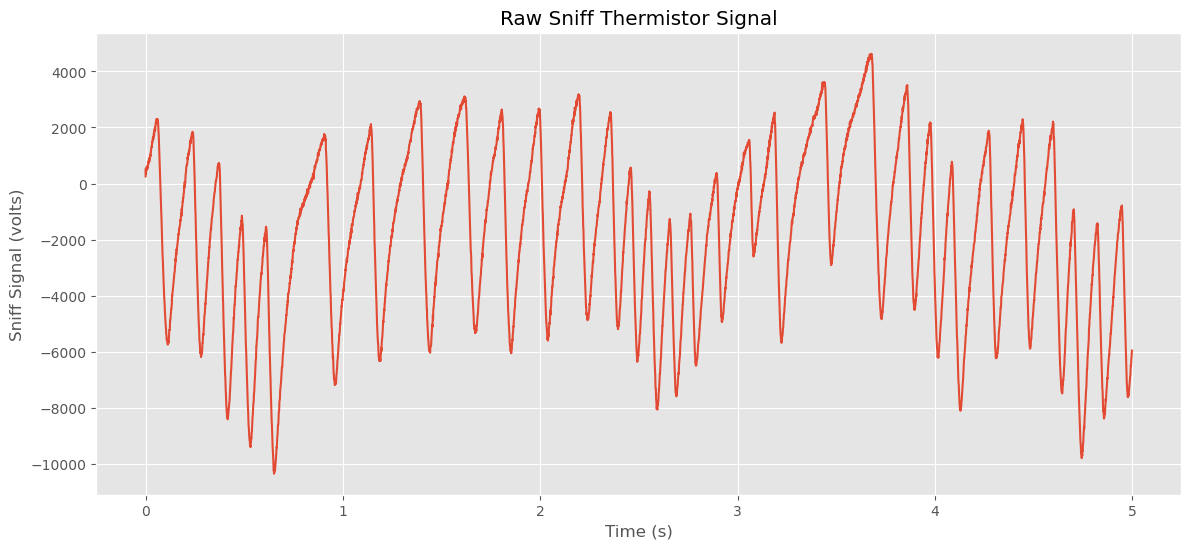

Available behavior data interfaces:
- exhalation_time
- inhalation_time

Number of inhalation events: 10030
Number of exhalation events: 10030


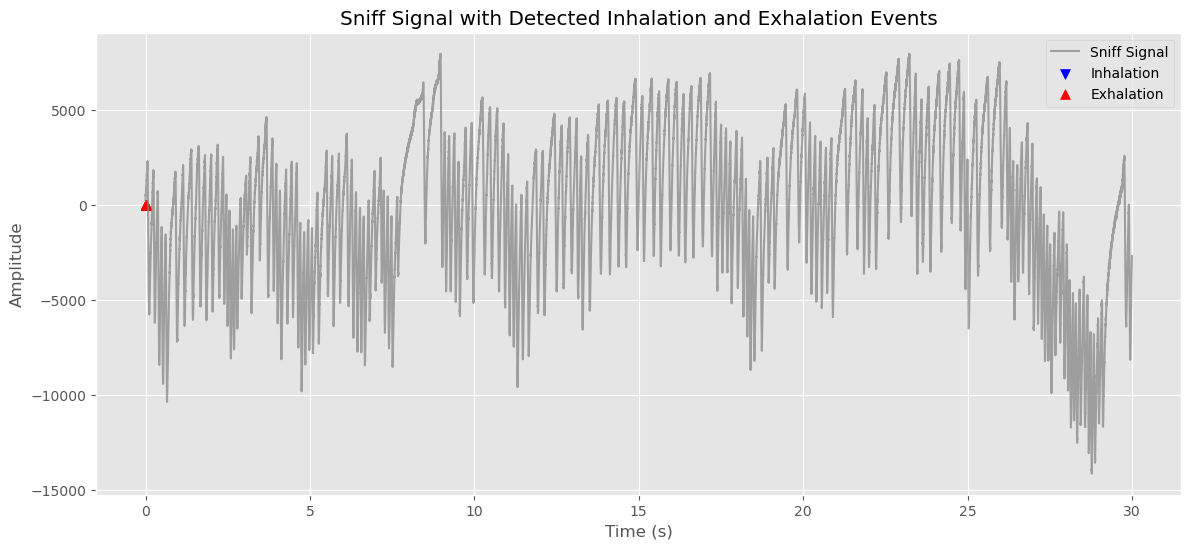

In [8]:
# Plot a sample of sniff signal data (first 5 seconds)
plt.figure(figsize=(14, 6))
plt.plot(time, sniff.data[:samples])
plt.xlabel('Time (s)')
plt.ylabel(f'Sniff Signal ({sniff.unit})')
plt.title('Raw Sniff Thermistor Signal')
plt.grid(True)
plt.show()

# Examine the processed sniff events from the behavior module
behavior = nwb.processing["behavior"]
print("Available behavior data interfaces:")
for name in behavior.data_interfaces:
    print(f"- {name}")

# Access inhalation and exhalation times
inhalation_time = behavior.data_interfaces["inhalation_time"]
exhalation_time = behavior.data_interfaces["exhalation_time"]

print(f"\nNumber of inhalation events: {len(inhalation_time.timestamps)}")
print(f"Number of exhalation events: {len(exhalation_time.timestamps)}")

# Plot inhalation and exhalation times for a 30-second segment
time_limit = 30  # seconds

# Select inhalation and exhalation events within the time window
# Convert Dataset to numpy array first
inh_timestamps = np.array(inhalation_time.timestamps[:])
exh_timestamps = np.array(exhalation_time.timestamps[:])

inh_mask = inh_timestamps < time_limit
exh_mask = exh_timestamps < time_limit

plt.figure(figsize=(14, 6))
# Plot raw sniff signal
plt.plot(np.arange(int(time_limit * sniff.rate)) / sniff.rate, 
         sniff.data[:int(time_limit * sniff.rate)], 
         color='gray', alpha=0.7, label='Sniff Signal')

# Mark inhalation and exhalation events
plt.scatter(inh_timestamps[inh_mask], 
            np.zeros_like(inh_timestamps[inh_mask]) + 0.5,
            color='blue', marker='v', s=50, label='Inhalation')
plt.scatter(exh_timestamps[exh_mask], 
            np.zeros_like(exh_timestamps[exh_mask]) - 0.5,
            color='red', marker='^', s=50, label='Exhalation')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sniff Signal with Detected Inhalation and Exhalation Events')
plt.legend()
plt.grid(True)
plt.show()

## 8. Analyzing Breathing Rhythm

Let's calculate and visualize breathing rhythm characteristics.

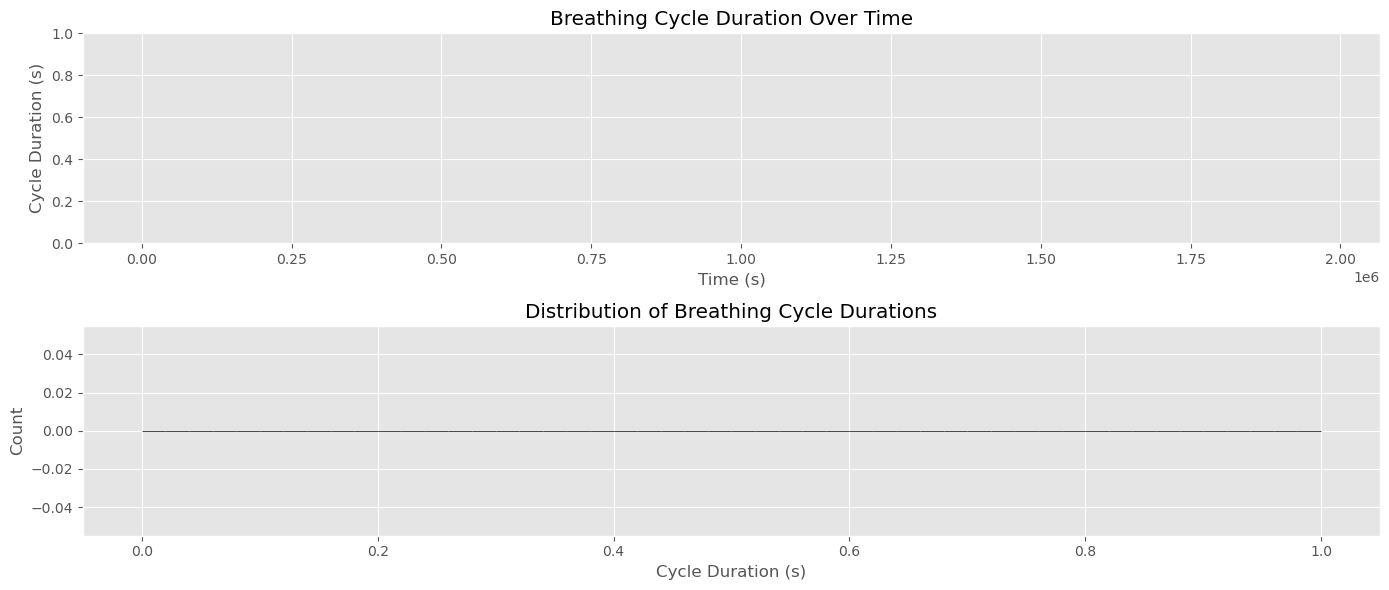

Average breathing cycle duration: 196.184 s
Average breathing frequency: 0.006 Hz
Median breathing frequency: 0.005 Hz
Standard deviation of breathing frequency: 0.003 Hz


In [9]:
# Calculate breathing cycle durations (time between consecutive inhalations)
# Convert timestamps to numpy arrays first
inh_timestamps = np.array(inhalation_time.timestamps[:])
breathing_cycles = np.diff(inh_timestamps)

plt.figure(figsize=(14, 6))
# Plot breathing cycle durations over time
plt.subplot(2, 1, 1)
plt.plot(inh_timestamps[1:], breathing_cycles)
plt.xlabel('Time (s)')
plt.ylabel('Cycle Duration (s)')
plt.title('Breathing Cycle Duration Over Time')
plt.grid(True)
plt.ylim(0, 1)  # Typical breathing cycle range

# Plot distribution of breathing cycle durations
plt.subplot(2, 1, 2)
plt.hist(breathing_cycles, bins=50, range=(0, 1), color='skyblue', edgecolor='black')
plt.xlabel('Cycle Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Breathing Cycle Durations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate breathing frequency (Hz)
breathing_freq = 1 / breathing_cycles

# Calculate statistics
print(f"Average breathing cycle duration: {np.mean(breathing_cycles):.3f} s")
print(f"Average breathing frequency: {np.mean(breathing_freq):.3f} Hz")
print(f"Median breathing frequency: {np.median(breathing_freq):.3f} Hz")
print(f"Standard deviation of breathing frequency: {np.std(breathing_freq):.3f} Hz")

## 9. Exploring Relationships Between Breathing and Neural Activity

Let's examine if there's any relationship between the breathing rhythm and the LFP signal. 
We'll align LFP data to inhalation events to see if there's a consistent pattern.

Number of valid alignment events: 10


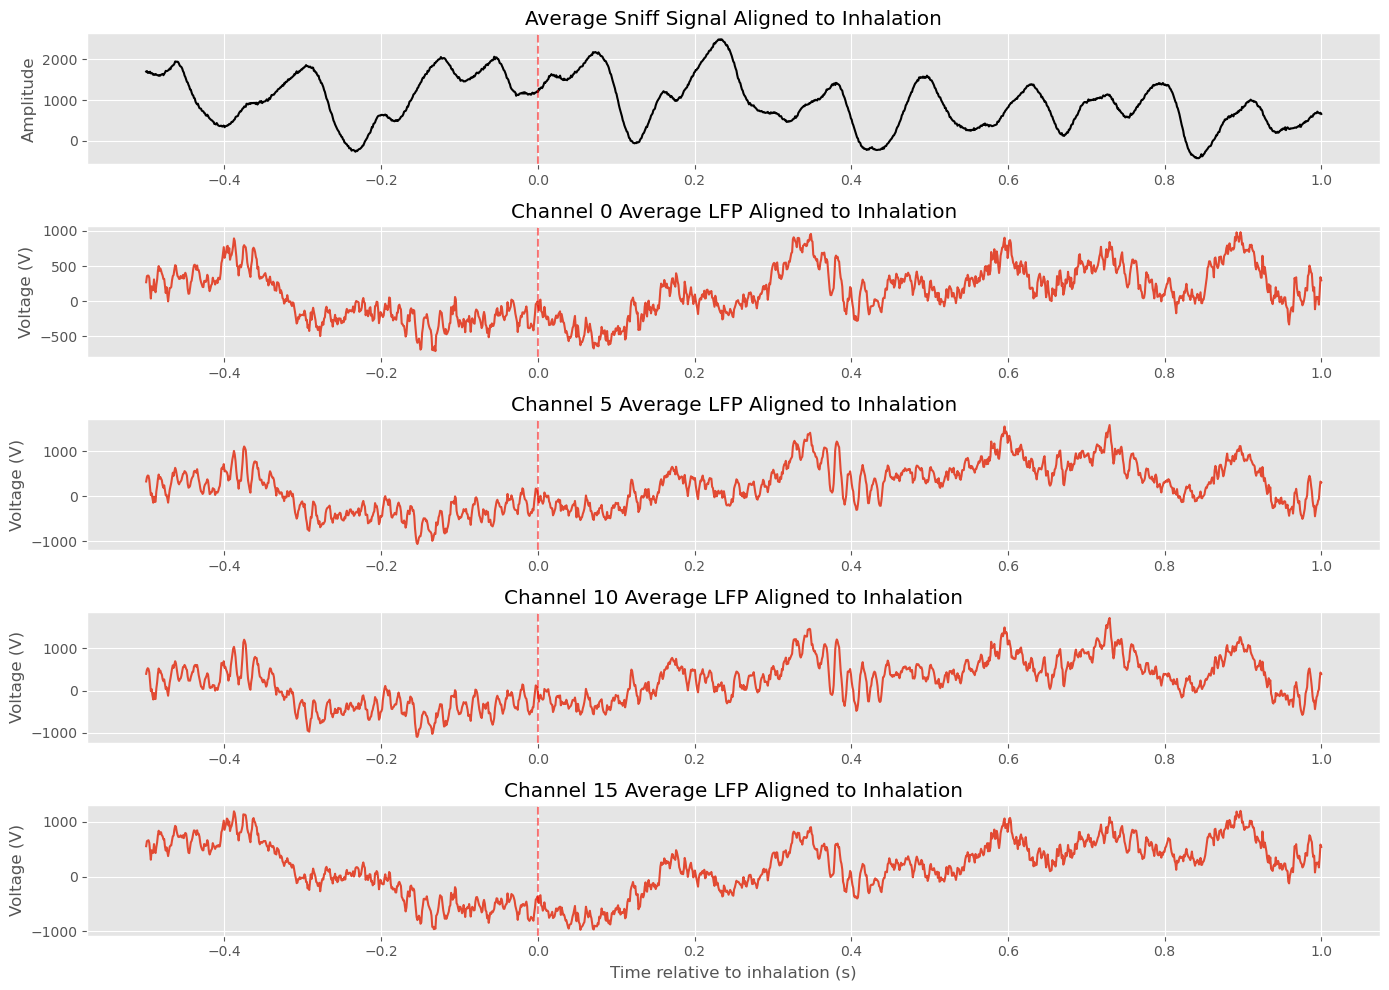

In [10]:
# Define parameters for event-triggered averaging
pre_time = 0.5  # seconds before inhalation
post_time = 1.0  # seconds after inhalation
sample_rate = lfp.rate
pre_samples = int(pre_time * sample_rate)
post_samples = int(post_time * sample_rate)
window_size = pre_samples + post_samples

# Select a few channels to analyze
channels_to_analyze = [0, 5, 10, 15]

# Initialize arrays to store aligned data
# Convert timestamps to numpy array first
inh_timestamps = np.array(inhalation_time.timestamps[:])
aligned_lfp = np.zeros((len(inh_timestamps), window_size, len(channels_to_analyze)))
aligned_sniff = np.zeros((len(inh_timestamps), window_size))

# Time indices for the window
window_times = np.linspace(-pre_time, post_time, window_size)

# Align LFP and sniff data to inhalation events
valid_events = 0
for i, inhalation_timestamp in enumerate(inh_timestamps):
    # Convert timestamp to sample index
    event_idx = int(inhalation_timestamp * sample_rate)
    
    # Check if we have enough data before and after the event
    if event_idx >= pre_samples and event_idx + post_samples <= len(lfp.data):
        start_idx = event_idx - pre_samples
        end_idx = event_idx + post_samples
        
        # Extract segment for each channel
        for j, channel in enumerate(channels_to_analyze):
            aligned_lfp[valid_events, :, j] = lfp.data[start_idx:end_idx, channel]
        
        # Extract sniff signal
        aligned_sniff[valid_events, :] = sniff.data[start_idx:end_idx]
        
        valid_events += 1

# Trim arrays to only include valid events
aligned_lfp = aligned_lfp[:valid_events, :, :]
aligned_sniff = aligned_sniff[:valid_events, :]

print(f"Number of valid alignment events: {valid_events}")

# Compute average aligned signals
avg_aligned_lfp = np.mean(aligned_lfp, axis=0)
avg_aligned_sniff = np.mean(aligned_sniff, axis=0)

# Plot average LFP response aligned to inhalation
plt.figure(figsize=(14, 10))

# Plot average sniff signal
plt.subplot(len(channels_to_analyze) + 1, 1, 1)
plt.plot(window_times, avg_aligned_sniff, 'k-')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.title('Average Sniff Signal Aligned to Inhalation')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot average LFP for each channel
for i, channel in enumerate(channels_to_analyze):
    plt.subplot(len(channels_to_analyze) + 1, 1, i + 2)
    plt.plot(window_times, avg_aligned_lfp[:, i])
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
    plt.title(f'Channel {channel} Average LFP Aligned to Inhalation')
    plt.ylabel('Voltage (V)')
    plt.grid(True)

plt.xlabel('Time relative to inhalation (s)')
plt.tight_layout()
plt.show()

## 10. Analyzing LFP Power During Different Breathing Phases

Let's examine if the power in different frequency bands of the LFP signal changes during different phases of the breathing cycle.

/opt/conda/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


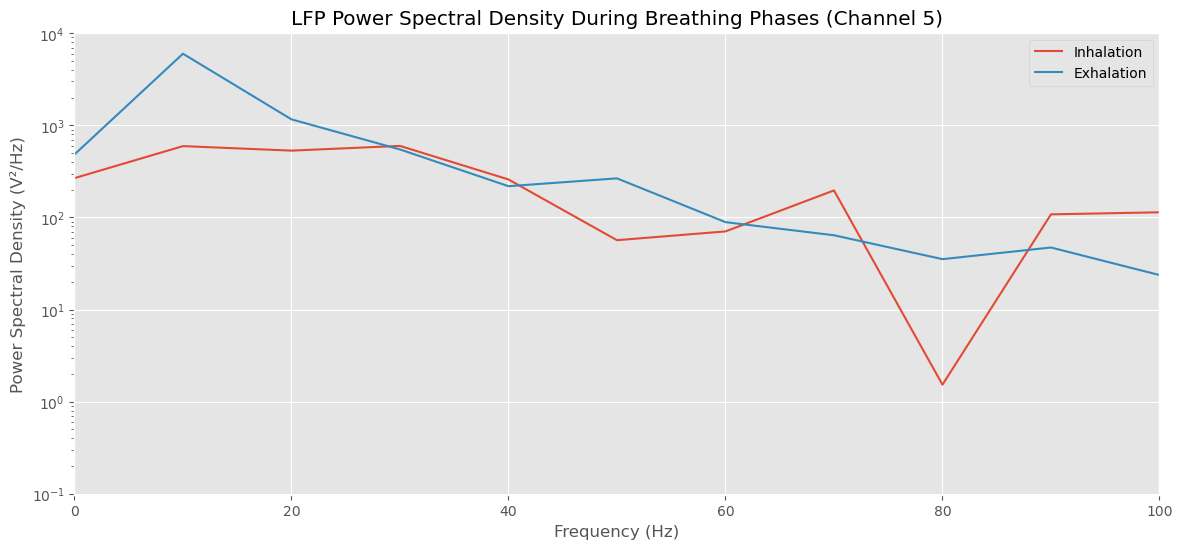

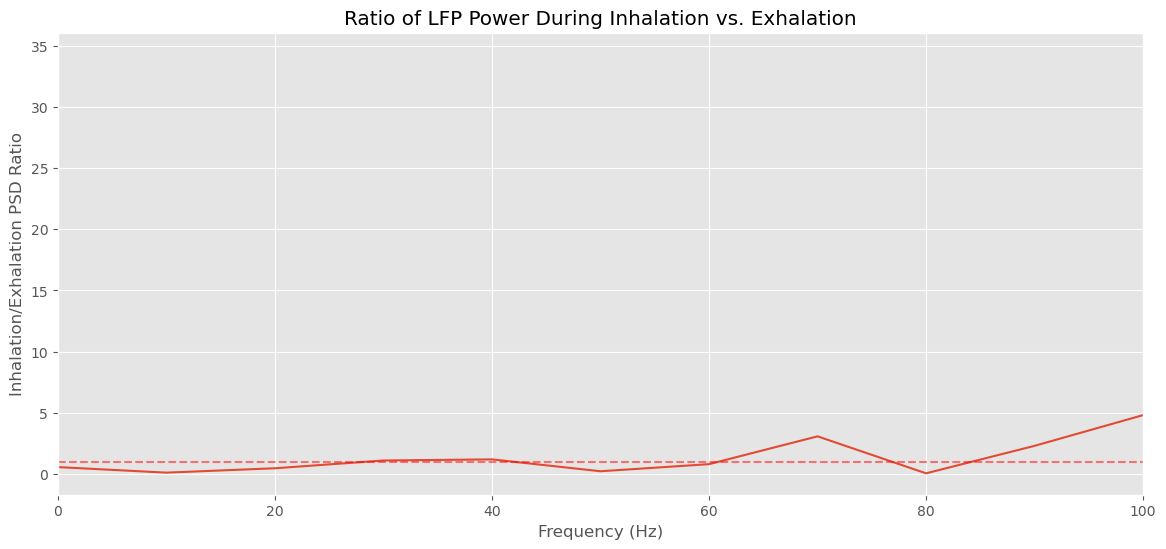

In [11]:
from scipy import signal

# Parameters for spectrum calculation
fs = lfp.rate  # Sampling frequency (Hz)
nperseg = 256  # Length of each segment (FFT window size)

# Define inhalation and exhalation periods (using 100ms after event)
inhalation_period_len = int(0.1 * fs)
exhalation_period_len = int(0.1 * fs)

# Initialize arrays to store spectra
inhalation_spectra = []
exhalation_spectra = []

# Loop through events within the first 100s to keep computation manageable
max_time = 100  # maximum analysis time in seconds
# Convert timestamps to numpy arrays first
inh_timestamps = np.array(inhalation_time.timestamps[:])
exh_timestamps = np.array(exhalation_time.timestamps[:])

inhalation_mask = inh_timestamps < max_time
exhalation_mask = exh_timestamps < max_time

# Select a single channel for spectral analysis
channel = 5  # Example channel

# Compute spectra for inhalation periods
for timestamp in inh_timestamps[inhalation_mask]:
    start_idx = int(timestamp * fs)
    if start_idx + inhalation_period_len < len(lfp.data):
        segment = lfp.data[start_idx:start_idx+inhalation_period_len, channel]
        # Compute power spectral density
        f, psd = signal.welch(segment, fs, nperseg=nperseg)
        inhalation_spectra.append(psd)

# Compute spectra for exhalation periods
for timestamp in exh_timestamps[exhalation_mask]:
    start_idx = int(timestamp * fs)
    if start_idx + exhalation_period_len < len(lfp.data):
        segment = lfp.data[start_idx:start_idx+exhalation_period_len, channel]
        # Compute power spectral density
        f, psd = signal.welch(segment, fs, nperseg=nperseg)
        exhalation_spectra.append(psd)

# Convert to arrays and compute mean
inhalation_spectra = np.array(inhalation_spectra)
exhalation_spectra = np.array(exhalation_spectra)

mean_inhalation_psd = np.mean(inhalation_spectra, axis=0)
mean_exhalation_psd = np.mean(exhalation_spectra, axis=0)

# Plot the results
plt.figure(figsize=(14, 6))
plt.semilogy(f, mean_inhalation_psd, label='Inhalation')
plt.semilogy(f, mean_exhalation_psd, label='Exhalation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title(f'LFP Power Spectral Density During Breathing Phases (Channel {channel})')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)  # Limit to 0-100 Hz range
plt.show()

# Calculate ratio to highlight differences
ratio = mean_inhalation_psd / mean_exhalation_psd

plt.figure(figsize=(14, 6))
plt.plot(f, ratio)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inhalation/Exhalation PSD Ratio')
plt.title('Ratio of LFP Power During Inhalation vs. Exhalation')
plt.grid(True)
plt.xlim(0, 100)  # Limit to 0-100 Hz range
plt.show()

## Summary and Future Directions

In this notebook, we've explored Dandiset 001433, which contains LFP recordings from the olfactory bulb and breathing data from freely-behaving mice. We've:

1. Examined the Dandiset metadata and file structure
2. Loaded and visualized LFP data from the olfactory bulb
3. Analyzed breathing patterns using the sniff signals
4. Explored relationships between breathing events and neural activity
5. Compared LFP spectral properties during different breathing phases

Future analyses could include:

- Examining data across different subjects to identify common patterns
- More detailed time-frequency analysis of LFP signals
- Correlation analyses between specific LFP frequency bands and breathing rhythms
- Analysis of how breathing patterns vary across recording sessions